# Laboratorio 1: Acceso a datos mediante pandas

En esta práctica accederemos a la Wikipedia para recabar los datos de población de un conjunto de países y realizaremos algunas representaciones gráficas.

En la [página web](https://https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population) enlazada en el campus virtual, y de título "Países por población: pasado, presente y futuro" se muestra la evolución de un buen número de países y territorios del mundo entre 1950 y 2050, organizada en un conjunto de tablas. En esta práctica combinaremos los datos de todos los países-territorios y todos los años en una sola trama de datos de panda, y visualizaremos los cambios en la población de los distintos países-territorios.

### Utilizaremos en esta práctica las siguientes librerías: 
[pandas](http://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos.  
[matplotlib](http://matplotlib.org/) permite generar múltiples tipos de gráficos.
 

### Realizaremos esta práctica en los siguientes pasos:

* Reunir los datos en una trama de datos panda
* Visualizar los datos

A continuación indicamos algunas operaciones iniciales para incorporar al proyecto algunas librerías útiles

In [1]:
# Comando IPython para preparar el cuaderno para matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Extraer las tablas a partir de un documento html de la Wikipedia
Utilizaremos el método read_html() de la librería pandas para leer las tablas que hay en el fichero html

In [2]:
# Ojo, en este documento html el separador de miles es una coma
url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population"

# LLamamos a la función read_html() para leer las tablas que hay en el fichero html
data = pd.read_html(url, header=0, index_col=0)

# Elimino la última tabla encontrada que no es necesaria
data = data[:-1]

# Imprimimos el número de tablas que hemos leído mediante la función len(). Deberían ser 3.
print(f'Número de tablas: {len(data)}')


Número de tablas: 3


## Construimos una sola tabla con la información de población
Reunimos las tablas con los diferentes periodos en una sola tabla, mediante los métodos de pandas join(), merge(), o concat(), extraemos la cabecera y seleccionamos las columnas que corresponden solamente a fechas. Podemos utilizar el método head() para inspeccionar las primeras filas de la tabla y que la salida sea más manejable.

In [3]:
# Reunimos las tres tablas en una sola mediante la función `concat`
df = pd.concat(objs=data, axis=1, sort=True)

# Imprimimos las primeras filas a modo de comprobación, mediante head()
print(df.head(5))

# Generamos una lista con la información almacenada en las columnas mediante list()
headers = list(df[1:])

# Seleccionamos de la cabecera las columnas correspondientes a las fechas mediante isnumeric()
# Puede ser útil el utilizar la noción de 'list comprehension' por sencillez
numeric_headers = [header for header in headers if header.isnumeric()]

# Leemos la tabla por fechas y la almacenamos para su uso. Imprimimos para verificar que es correcto
df_dates = df[numeric_headers]
print(df_dates.head(5))


                                  1950  1955     %   1960   %.1   1965    %.2  \
Country (or dependent territory)                                                
Afghanistan                       8151  8892  1.76   9830  2.03  10998   2.27   
Albania                           1228  1393  2.56   1624  3.12   1884   3.02   
Algeria                           8893  9842  2.05  10910  2.08  11964   1.86   
American Samoa                      20    20  0.72     21  0.20     25   4.23   
Andorra                              7     7  0.04      9  6.28     14  10.17   

                                   1970   %.3   1975  ...   2030   %.2   2035  \
Country (or dependent territory)                      ...                       
Afghanistan                       12431  2.48  14133  ...  45665  2.12  50195   
Albania                            2157  2.74   2402  ...   3103 -0.01   3063   
Algeria                           13932  3.09  16141  ...  48149  0.99  50118   
American Samoa             

## Algunas funciones de acceso a datos para una trama de pandas
Jugaremos con las posibilidades de pandas para manejar tablas mediante un conjunto sencillo de ejercicios.

### Ejercicio 1
Imprimir la tabla correspondiente a las poblaciones de Alemania, Andorra y Angola desde 2015 a 2025.

In [4]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .loc
subtable1 = df_dates.loc[['Germany', 'Andorra',
                          'Angola'], ['2015', '2020', '2025']]
print("Poblaciones de Alemania, Andorra y Angola desde 2015 a 2025:")
print(subtable1)


Poblaciones de Alemania, Andorra y Angola desde 2015 a 2025:
                                   2015   2020   2025
Country (or dependent territory)                     
Germany                           80855  82983  80027
Andorra                              86     86     86
Angola                            19626  22485  25674


### Ejercicio 2
Imprimir la subtabla que va desde las filas 3 a 8 y desde las columnas 5 a 9.

In [5]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .iloc
subtable2 = df_dates.iloc[2:8, 4:9]
print("Subtabla de las filas 3 a 8 y columnas 5 a 9:")
print(subtable2)


Subtabla de las filas 3 a 8 y columnas 5 a 9:
                                   1970   1975   1980   1985   1990
Country (or dependent territory)                                   
Algeria                           13932  16141  18807  22009  25191
American Samoa                       28     30     33     39     48
Andorra                              20     27     34     45     53
Angola                             5606   6051   7206   8390   9486
Anguilla                              7      7      7      7      9
Antigua and Barbuda                  66     69     69     65     65


### Ejercicio 3
Imprimir la columna correspondiente al año 1955.

In [6]:
# Creamos una columna mediante selección por el título de la columna
subtable3 = df_dates.loc[:, '1955']

print('Población de 1955:')
print(subtable3)


Población de 1955:
Country (or dependent territory)
Afghanistan          8892
Albania              1393
Algeria              9842
American Samoa         20
Andorra                 7
                   ...   
Western Sahara         16
World             2782099
Yemen                5266
Zambia               2870
Zimbabwe             3410
Name: 1955, Length: 228, dtype: int64


### Ejercicio 4
Imprimir los datos de la fila número 15.

In [7]:
# Seleccionamos una fila mediante la opción .iloc
subtable4 = df_dates.iloc[14, :]
print("Datos de la fila número 15:")
print(subtable4)


Datos de la fila número 15:
1950     71
1955     88
1960    113
1965    140
1970    171
1975    190
1980    210
1985    229
1990    246
1995    266
2000    283
2005    297
2010    311
2015    325
2020    338
2025    350
2030    359
2035    365
2040    369
2045    372
2050    372
Name: Bahamas, dtype: int64


### Ejercicio 5
Imprimir la población de Barbados en 1995.

In [8]:
# Seleccionamos una celda mediante la opción .loc
subtable5 = df_dates.loc['Barbados', '1995']
print(f'Población de Barbados: {subtable5}')


Población de Barbados: 268


### Ejercicio 6
Imprimir el valor máximo de las poblaciones de 1975 e identificar el país correspondiente.

In [9]:
# Utilizamos la función drop() para eliminar los valores totales mundiales
df_dates_wo_world = df_dates.drop('World')
subtable6 = df_dates_wo_world.loc[:, '1975']

# Utilizamos la función max() para calcular el máximo
max_population = subtable6.max()
print(f"Valor máximo de las poblaciones en 1975: {max_population}")

# Utilizamos idxmax() para identificar el país que corresponde al valor máximo
country_w_max_population = subtable6.idxmax()
print(f"País correspondiente: {country_w_max_population}")


Valor máximo de las poblaciones en 1975: 920295
País correspondiente: China


### Ejercicio 7
Imprimir los nombres de las filas.

In [10]:
# Utilizamos la opción .index
print("Nombres de las filas:")
print(df_dates_wo_world.index)


Nombres de las filas:
Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country (or dependent territory)', length=227)


## Dibujar la población de 4 países en un año
Dibujar mediante un diagrama de barras la población de Argentina, Suecia, Polonia y Libia en 1995, ordenadas de menor a mayor, utilizando la librerías matplotlib.

<AxesSubplot:title={'center':'Población por países'}, xlabel='País o territorio', ylabel='# población (miles)'>

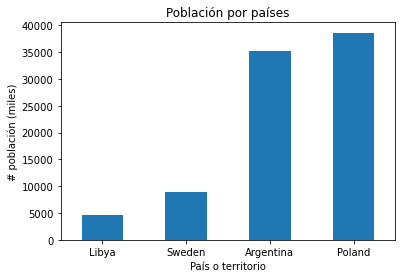

In [11]:
# Generamos una lista con los nombres de los países del enunciado
countries_plot1 = ['Argentina', 'Sweden', 'Poland', 'Libya']

# Utilizamos la opción .loc para seleccionar la subtabla que dibujaremos
subtable7 = df_dates.loc[countries_plot1, ['1995']]

# Utilizamos la función .sort_values() para ordenar la subtabla y .plot(kind='bar') para dibujar
subtable7 = subtable7.sort_values(by='1995', ascending=True)

# Dibujamos la gráfica
subtable7.plot.bar(title='Población por países', xlabel='País o territorio',
                   ylabel='# población (miles)', legend=False, rot=0)


## Dibujar la evolución de la población de 4 países
Dibujar la evolución de la población en todo el periodo para los siguientes países: Alemania, España, Estados Unidos e Italia.

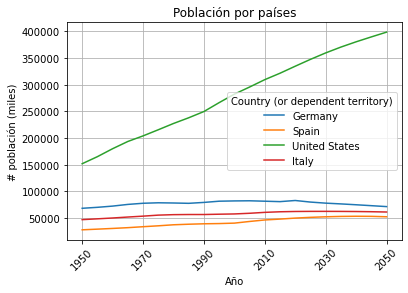

In [12]:
# Generamos una lista con los nombres de los países del enunciado
countries_plot2 = ["Germany", "Spain", "United States", "Italy"]

# Generamos la subtabla correspondiente con la opción .loc (se transpone el resultado)
subtable8 = df_dates.loc[countries_plot2, :].transpose()

# Utilizamos la función plot(kind='line') para dibujar, añadimos las fechas a la figura y etiquetamos los ejes
plot2 = subtable8.plot(kind="line", title="Población por países", xlabel="Año",
                       ylabel="# población (miles)", xticks=np.arange(0, 21, 4), rot=45)

# Añadimos el grid
plot2.grid()


## Dibujar la evolución de los 5 países más populosos hasta 2010 y 2050  
Dibujar dos gráficas: una con la evolución para todo el período de los países más populosos en 2010, y otra con los países más populosos en 2050. Utilizaremos una función plot_populosos() a la que daremos como argumento el año de interés.

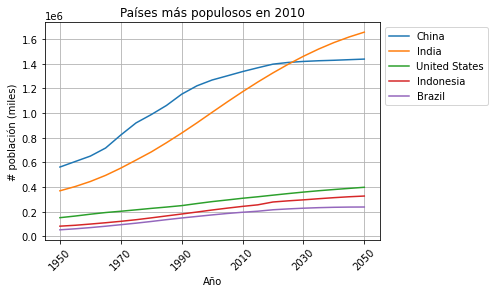

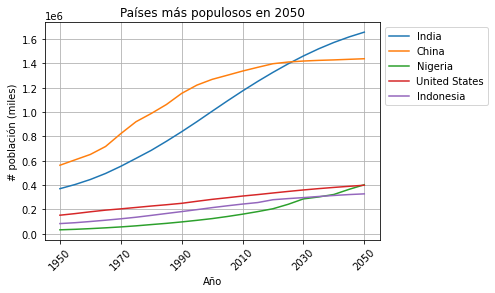

In [13]:
# Mediante la función plot de las librerías matplotlib
def plot_populosos(tabla, ano):
    # Primero, debemos eliminar en primer lugar los valores mundiales
    tabla_wo_world = tabla.drop('World')

    # Ordenamos la tabla según el año
    tabla_wo_world_sorted = tabla_wo_world.sort_values(
        by=ano, axis=0, ascending=False)

    # Seleccionamos los cinco primeros países mediante .iloc, y extraemos sus nombres
    tabla_wo_world_sorted_top5 = tabla_wo_world_sorted.iloc[0:5, :].index

    # Utilizamos los nombres para invocar la subtabla mediante .loc
    subtable = tabla_wo_world_sorted.loc[tabla_wo_world_sorted_top5, :]

    # Transponemos
    subtable = subtable.transpose()

    # Dibujamos mediante plot(kind='line')
    plot = subtable.plot(kind="line", title=f"Países más populosos en {ano}", xlabel="Año",
                         ylabel="# población (miles)", xticks=np.arange(0, 21, 4), rot=45)

    # Añadimos el grid y situamos la leyenda fuera de la tabla para mejor legibilidad
    plot.grid()
    plot.legend(bbox_to_anchor=(1, 1))


# Aquí invocamos la función plot_populosos()
plot_populosos(df_dates, '2010')
plot_populosos(df_dates, '2050')
